#  Netflix IMDB Scores ANALYSIS



### *Importing necessary libraries*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline

In [2]:
# Importing Netflix Dataset 
df = pd.read_csv("Netflix TV Shows and Movies.csv")

# Reading Data
df.head()

index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2                 R       94  tt0079470         8.0    392419.0  
3                 R      133  tt0070047         8.1    391942.0  
4             TV-14       30  tt0063929         8.8     72895.0

# Understanding the Data

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB
None
             index  release_year      runtime   imdb_score    imdb_votes
count  5283.000000   5283.000000  5283.000000  5283.000000  5.267000e+03
mean   2641.000000   2015.879992    79.199886     6.53

# Data Cleaning

In [4]:
# Removing Duplicates
df.drop_duplicates()

index         id                               title   type  \
0         0    tm84618                         Taxi Driver  MOVIE   
1         1   tm127384     Monty Python and the Holy Grail  MOVIE   
2         2    tm70993                       Life of Brian  MOVIE   
3         3   tm190788                        The Exorcist  MOVIE   
4         4    ts22164        Monty Python's Flying Circus   SHOW   
...     ...        ...                                 ...    ...   
5278   5278  tm1040816         Momshies! Your Soul is Mine  MOVIE   
5279   5279  tm1014599                           Fine Wine  MOVIE   
5280   5280  tm1045018                               Clash  MOVIE   
5281   5281  tm1098060                      Shadow Parties  MOVIE   
5282   5282   ts271048  Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     A mentally unstable Vietnam War veteran works ...          1976   
1     King Arthur, accompanied by his squire, recrui...          1975   
2     Brian Cohen is an average young Jewish man, bu...          1979   
3     12-year-old Regan MacNeil begins to adapt an e...          1973   
4     A British sketch comedy series with the shows ...          1969   
...                                                 ...           ...   
5278  Three women with totally different lives accid...          2021   
5279  A beautiful love story that can happen between...          2021   
5280  A man from Nigeria returns to his family in Ca...          2021   
5281  A family faces destruction in a long-running c...          2021   
5282  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime     imdb_id  imdb_score  imdb_votes  
0                    R      113   tt0075314         8.3    795222.0  
1                   PG       91   tt0071853         8.2    530877.0  
2                    R       94   tt0079470         8.0    392419.0  
3                    R      133   tt0070047         8.1    391942.0  
4                TV-14       30   tt0063929         8.8     72895.0  
...                ...      ...         ...         ...         ...  
5278               NaN      108  tt14412240         5.8        26.0  
5279               NaN      100  tt13857480         6.9        39.0  
5280               NaN       88  tt14620732         6.5        32.0  
5281               NaN      116  tt10168094         6.2         9.0  
5282               NaN        0  tt13711094         8.8        16.0  

[5283 rows x 11 columns]

In [5]:
# Checking Null Values
df.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [6]:
df["age_certification"].fillna(method = "ffill", inplace = True)
df["imdb_votes"].fillna(method = "ffill", inplace = True)

In [7]:
# Drop Additional and Trash Data 

df.drop(columns = ["id","imdb_id","index"])
df.head(5)

index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2                 R       94  tt0079470         8.0    392419.0  
3                 R      133  tt0070047         8.1    391942.0  
4             TV-14       30  tt0063929         8.8     72895.0

# Initial Data Exploration

#### *Descriptive Statistics:*

In [8]:
df.describe()

index  release_year      runtime   imdb_score    imdb_votes
count  5283.000000   5283.000000  5283.000000  5283.000000  5.283000e+03
mean   2641.000000   2015.879992    79.199886     6.533447  2.334942e+04
std    1525.215067      7.346098    38.915974     1.160932  8.701102e+04
min       0.000000   1953.000000     0.000000     1.500000  5.000000e+00
25%    1320.500000   2015.000000    45.000000     5.800000  5.150000e+02
50%    2641.000000   2018.000000    87.000000     6.600000  2.272000e+03
75%    3961.500000   2020.000000   106.000000     7.400000  1.013650e+04
max    5282.000000   2022.000000   235.000000     9.600000  2.268288e+06

In [9]:
# Finding the highest IMDb score and Highest Ruuntime for Movie or Show 


column = ['runtime','imdb_score']
highest_score = df[column].max()
print("The Highest IMDB Score for any MOVIE or SHOW is ", highest_score["imdb_score"])
print("The Highest IMDB runtime for any MOVIE or SHOW is ", highest_score["runtime"], "minutes")

# Finding the Lowest IMDb score and Runtime for Movie or Show


lowest_score = df[column].min()
print("The Lowest IMDB Score for any MOVIE or SHOW is ", lowest_score["imdb_score"])
print("The Lowwest IMDB runtime for any MOVIE or SHOW is ", lowest_score["runtime"],"minutes")

The Highest IMDB Score for any MOVIE or SHOW is  9.6
The Highest IMDB runtime for any MOVIE or SHOW is  235.0 minutes
The Lowest IMDB Score for any MOVIE or SHOW is  1.5
The Lowwest IMDB runtime for any MOVIE or SHOW is  0.0 minutes


# Total Distribution of movies and shows

type
MOVIE    3407
SHOW     1876
Name: type, dtype: int64
Percentage Distribution of Movies and Shows:
MOVIE    64.489873
SHOW     35.510127
Name: type, dtype: float64


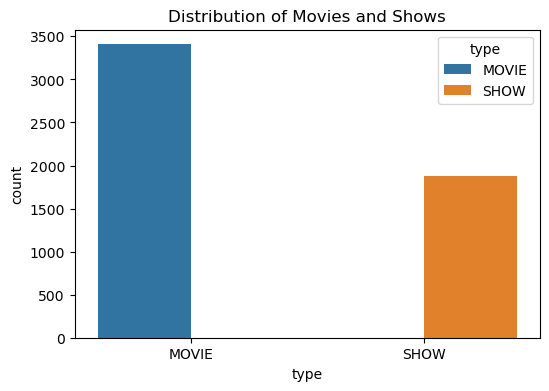

In [10]:
# Number-wise Distribution

plt.figure(figsize= (6,4))
sns.countplot(x="type",data = df, hue = 'type')
plt.title("Distribution of Movies and Shows");
print(df.groupby('type')['type'].count())

# Percentage by Distribution

type_counts = df['type'].value_counts()
type_percentages = type_counts / len(df) * 100
print("Percentage Distribution of Movies and Shows:")
print(type_percentages)

## Distribution of IMDb Scores:

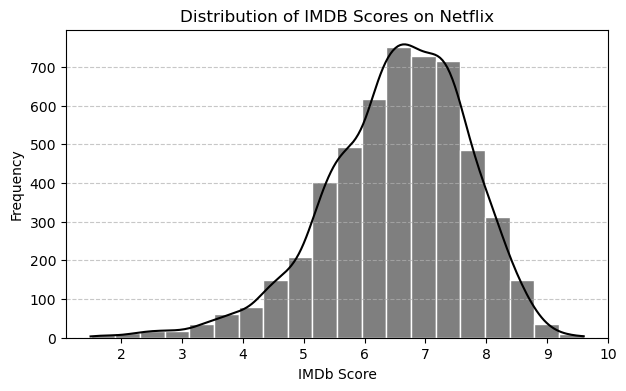

In [11]:
plt.figure(figsize=(7, 4))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='black', edgecolor='white')
plt.title('Distribution of IMDB Scores on Netflix')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## What is the Average IMDb Score for Movies and Shows Seperately?

In [12]:
average_scores = df.groupby('type')['imdb_score'].mean()

print("Average IMDb Score for Movies:", average_scores['MOVIE'])
print("Average IMDb Score for Shows:", average_scores['SHOW'])

Average IMDb Score for Movies: 6.266979747578515
Average IMDb Score for Shows: 7.017377398720683


## Oldest and Newest Titles:

In [13]:
oldest_title = df.loc[df['release_year'].idxmin()]['title']
oldest_year = df['release_year'].min()
print("Oldest Title:", oldest_title)
print("Oldest Release Year:", oldest_year)

newest_title = df.loc[df['release_year'].idxmax()]['title']
newest_year = df['release_year'].max()
print("Newest Title:", newest_title)
print("Newest Release Year:", newest_year)


Oldest Title: Raya and Sakina
Oldest Release Year: 1953
Newest Title: Anatomy of a Scandal
Newest Release Year: 2022


### Most Common Age Certification:

In [14]:
most_common_movie_certification = df[df['type'] == 'MOVIE']['age_certification'].value_counts().idxmax()
print("Most Common Age Certification for Movies:", most_common_movie_certification)


most_common_show_certification = df[df['type'] == 'SHOW']['age_certification'].value_counts().idxmax()
print("Most Common Age Certification for Shows:", most_common_show_certification)


Most Common Age Certification for Movies: R
Most Common Age Certification for Shows: TV-MA


## Runtime Analysis:

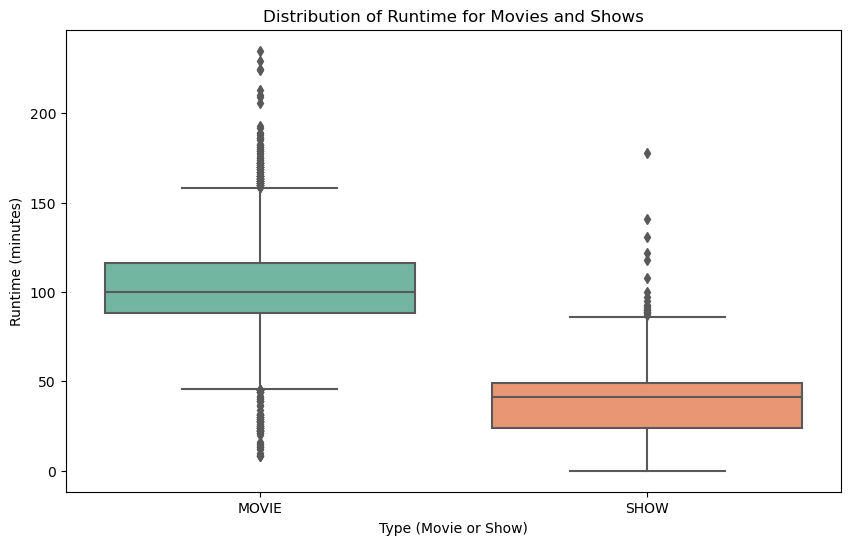

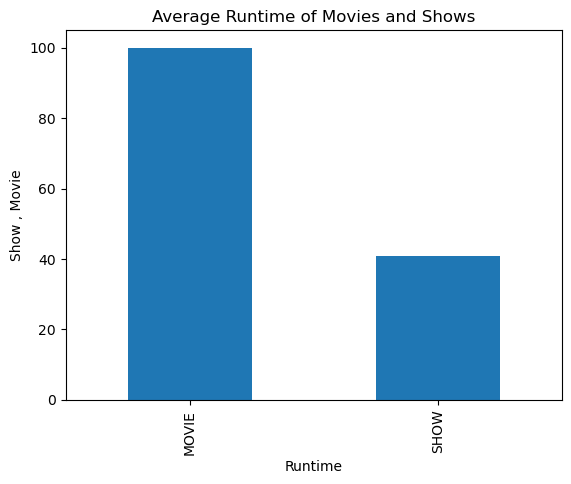

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='runtime', data=df, palette='Set2')
plt.title('Distribution of Runtime for Movies and Shows')
plt.xlabel('Type (Movie or Show)')
plt.ylabel('Runtime (minutes)')
plt.show()
value = df.groupby('type')['runtime'].agg('median').plot(kind  = 'bar')
plt.title("Average Runtime of Movies and Shows")
plt.xlabel("Runtime")
plt.ylabel("Show , Movie");


Average runtime of movies  101.54 minutes


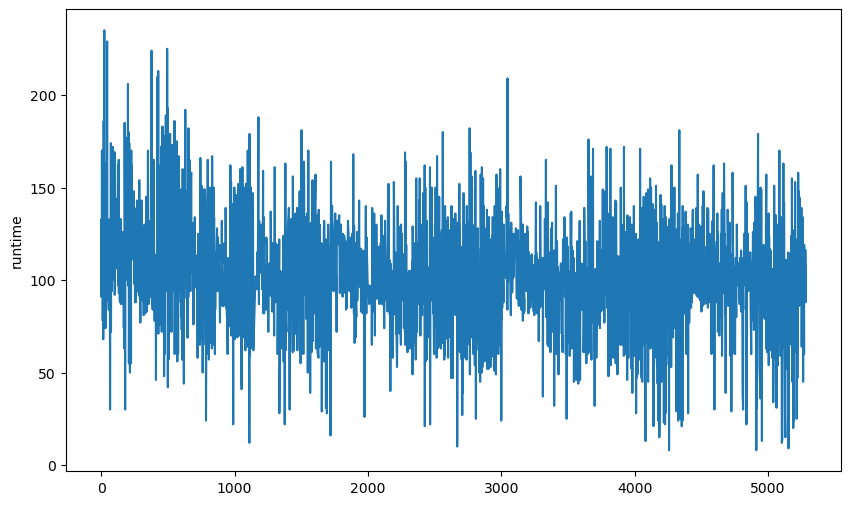

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(df[df["type"]=="MOVIE"]["runtime"])
average = round(df[df["type"]=="MOVIE"]['runtime'].mean(),2)
 
print("Average runtime of movies ", average, "minutes")

Average Show Runtime is  38.63 minutes


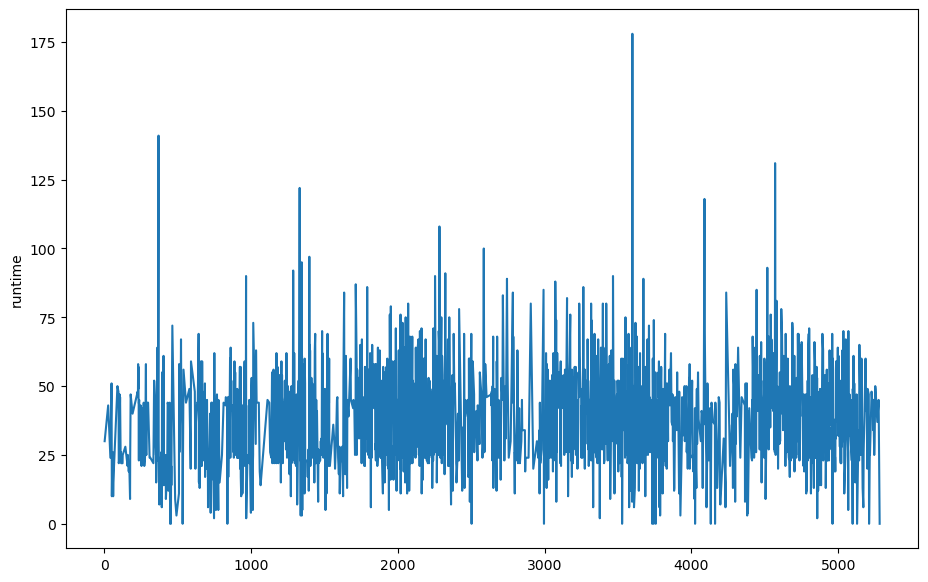

In [17]:
plt.figure(figsize = (11,7))
sns.lineplot(df[df['type']=='SHOW']['runtime'])
average2 = round(df[df["type"]=='SHOW']['runtime'].mean(),2)
print("Average Show Runtime is ", average2, "minutes" )

## Top-rated Titles:

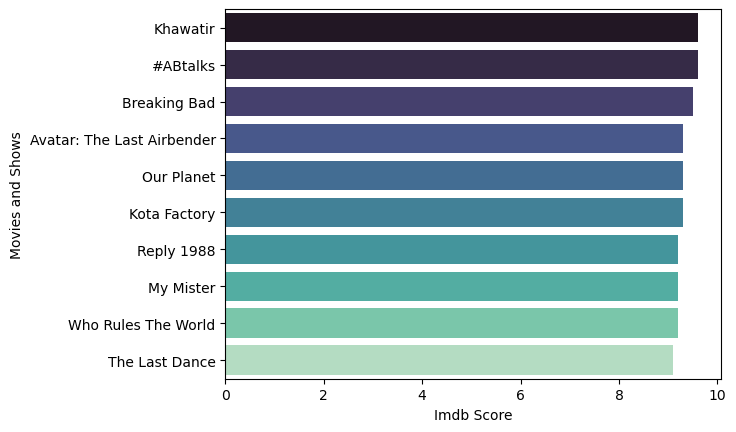

In [18]:
top_rated = df.nlargest(10, 'imdb_score') 
top_rated
sns.barplot(x= "imdb_score", y = "title",data = top_rated, palette= 'mako')
plt.xlabel("Imdb Score")
plt.ylabel("Movies and Shows");

## Low Rated Movies and Shows

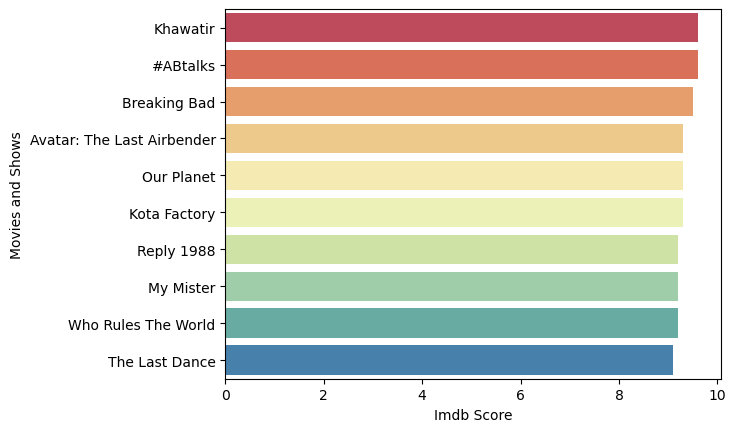

In [19]:
low_rated = df.nsmallest(10, 'imdb_score') 
low_rated
sns.barplot(x= "imdb_score", y = "title",data = top_rated, palette= 'Spectral')
plt.xlabel("Imdb Score")
plt.ylabel("Movies and Shows");

### Age Certification Distribution::

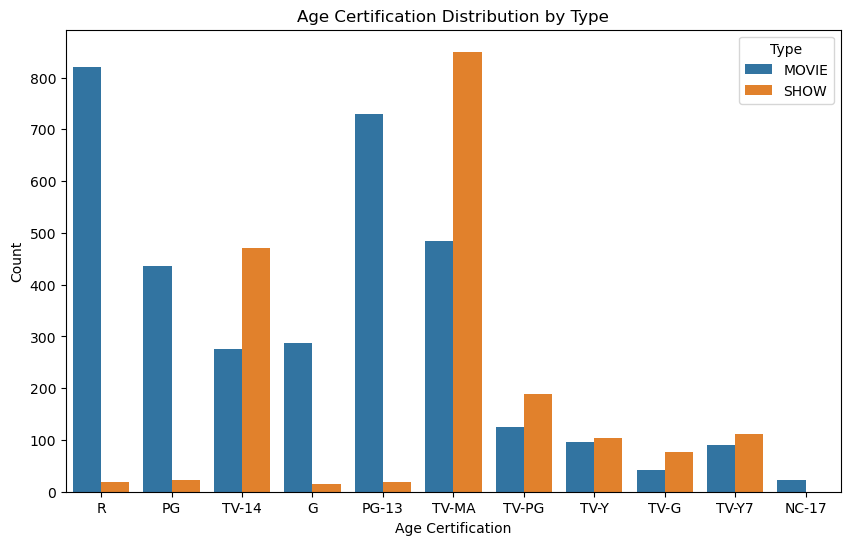

age_certification
NC-17      22
TV-G      117
TV-Y      200
TV-Y7     203
G         303
TV-PG     314
PG        458
TV-14     746
PG-13     748
R         838
TV-MA    1334
Name: age_certification, dtype: int64


In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_certification', hue = 'type', data = df)
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Age Certification Distribution by Type')
plt.legend(title='Type')
plt.show()

print(df.groupby("age_certification")["age_certification"].count().sort_values())

### Number of Movies vs Release Year 

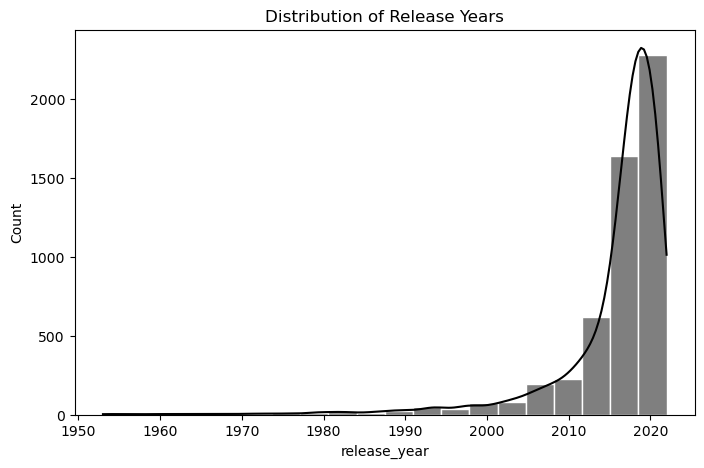

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(x='release_year', bins=20, kde=True, data=df, color='black', edgecolor='white')
plt.title('Distribution of Release Years')
plt.show()

# Visualization

## IMDb Score vs. Release Year:

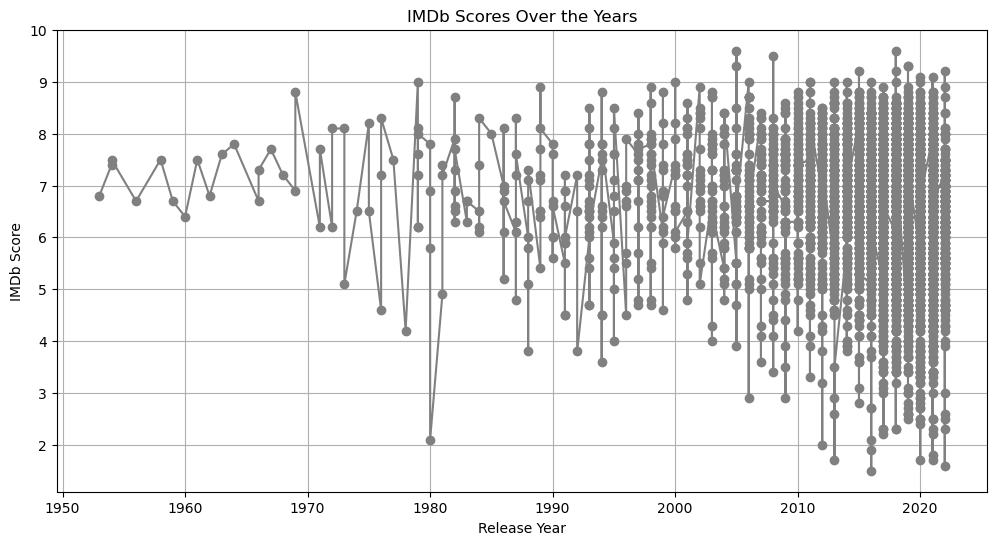

In [22]:
df_sorted = df.sort_values(by='release_year')

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['release_year'], df_sorted['imdb_score'], marker='o', linestyle='-', color='grey')
plt.title('IMDb Scores Over the Years')
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

## Box Plots for IMDb Scores:

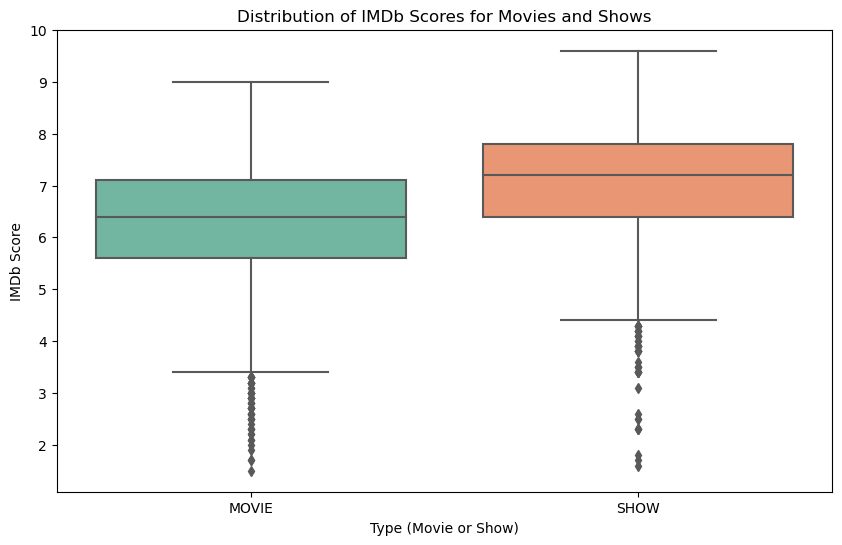

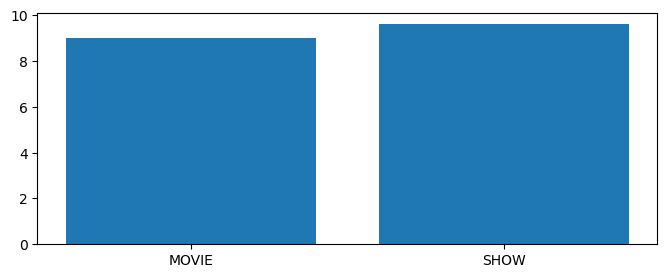

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='imdb_score', data=df, palette='Set2')
plt.title('Distribution of IMDb Scores for Movies and Shows')
plt.xlabel('Type (Movie or Show)')
plt.ylabel('IMDb Score')
plt.show()

plt.figure(figsize=(8,3))
plt.bar(df.type,df.imdb_score);

## Age Certification Pie Chart:

TV-MA    1334
R         838
PG-13     748
TV-14     746
PG        458
TV-PG     314
G         303
TV-Y7     203
TV-Y      200
TV-G      117
NC-17      22
Name: age_certification, dtype: int64


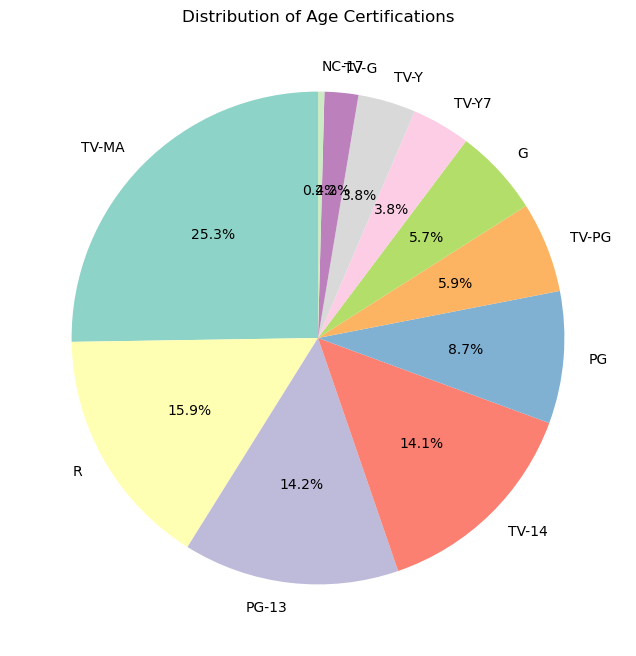

In [24]:
age_certification_counts = df['age_certification'].value_counts()
print(age_certification_counts)


plt.figure(figsize=(8,8))
plt.pie(age_certification_counts, labels=age_certification_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribution of Age Certifications')
plt.show()

## Top Movies on IMDb by scores

In [25]:
avg_votes_show =round(df[(df['type'] == 'SHOW')]['imdb_votes'].mean())
avg_votes_movie = round(df[(df['type'] == 'MOVIE')]['imdb_votes'].mean())

top_movies = df[(df['type'] == 'MOVIE') & (df['imdb_votes'] > avg_votes_movie)].sort_values('imdb_score', ascending = False).head(5)
top_movies = top_movies[['title', 'imdb_score', 'imdb_votes']]

fig = px.treemap(top_movies, path=['title'], values='imdb_score', title='Top 5 movies on IMDb by scores',)
fig.show()

## Top 5 Shows on IMDb by Scores

In [26]:
top_shows = df[(df['type'] == 'SHOW') & (df['imdb_votes'] > avg_votes_show)].sort_values('imdb_score', ascending = False).head(5)
top_shows = top_shows[['title', 'imdb_score', 'imdb_votes']]
fig = px.treemap(top_shows, path=['title'], values='imdb_score', title='Top 5 shows on IMDb by scores')
fig.show()

# Additional Analysis

## IMDb Scores and Votes Across Release Years

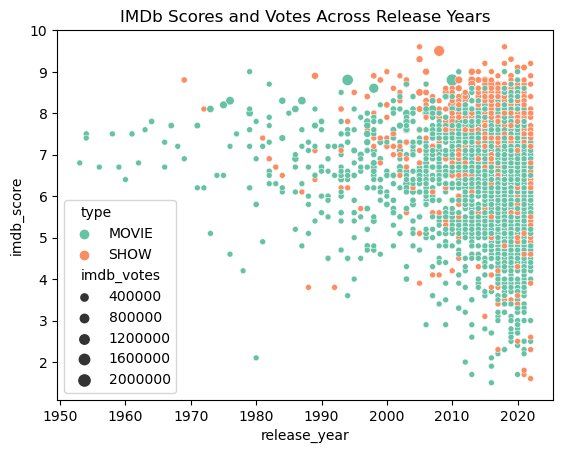

In [27]:
sns.scatterplot(x='release_year', y='imdb_score', hue='type', size='imdb_votes', data=df, palette='Set2')
plt.title('IMDb Scores and Votes Across Release Years')
plt.show()